<a href="https://colab.research.google.com/github/felipe-gm/ifusp_fiscomp_2/blob/master/2020_04_01/Questao2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Related third party imports

In [0]:
import matplotlib.pyplot as plt

from numpy import arange, array, concatenate

Variaveis globais

In [0]:
a = .0        # Inicio do intervalo da variavel independente 
b = 1e3       # Final do intervalo da variavel independente
h = 1e-1      # Tamanho inicial de um passo de integracao
prec = 1e-6   # Precisao desejada do passo

Constantes

In [0]:
OMEGA_X = 1.

# Equacoes de diferenca

In [0]:
def f(r,t):
    return concatenate((f_x(r[:2],t), f_y(r[2:],t)))

In [0]:
def f_x(r,t):
    pos, v = r[0], r[1]
    fpos, fv = v, -OMEGA_X**2 * pos
    return array([fpos, fv], float)

In [0]:
def f_y(r,t):
    pos, v = r[0], r[1]
    fpos, fv = v, -omega_y**2 * pos
    return array([fpos, fv], float)

# Integracao numerica

In [0]:
def passo_rk4(f,r,t,h):
    """Calcula um passo no metodo de RK4

    Positional arguments:
    f -- equacao de difereca multidimensional (type function)
    r -- vetor vetor de posicao no espaco de estados (type numpy.ndarray)
    t -- tempo (type float)
    h -- tamnho de um passo de integracao (type float)
    """
    k1 = h*f(r,t)
    k2 = h*f(r+.5*k1,t+.5*h)
    k3 = h*f(r+.5*k2,t+.5*h)
    k4 = h*f(r+k3,t+h)
    return (k1+2.*(k2+k3)+k4)/6.

In [0]:
def passo_adapt_extloc(f,r,t,h,prec): # Passo adaptativo com extrapolação local
    razao = 1.0 + 1e-10               # Começamos com uma razão igual a 1
    while razao >= 1.0 + 1e-10:       # Laço até que a razão seja menor que 1
        h /= razao                              # Ajustamos o tamanho do passo
        dr21 = passo_rk4(f,r,t,h)               # Um passo de tamanho h
        dr2 = dr21 + passo_rk4(f,r+dr21,t+h,h)  # Dois passos de tamanho h
        dr1 = passo_rk4(f,r,t,2*h)              # Um só passo de tamanho 2h
        epsilon = (dr2 - dr1)/30
        # Erro estimado em um passo h:
        erro = (epsilon[0]**2 + epsilon[2]**2)**(1/2) 
        razao = (erro/(h*prec))**0.25
    h_prox = min(h/(razao+1e-10),2*h)           # Limitando o aumento do passo
    dr = dr2 + (dr2 - dr1)/15
    return dr, 2*h, h_prox      # Retorna o incremento de r e os tamanhos
                                # do passo atual e do próximo passo 

Condicoes iniciais (e.g.: r(a))

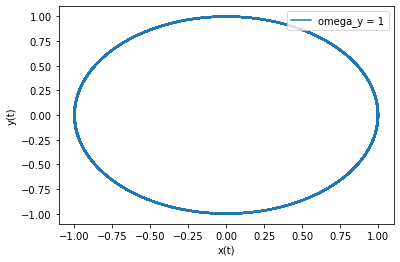

In [0]:
ra = array([.0,1.,1.,.0],float)
r = ra
t = a
h_atual = h

x_lista, y_lista, h_lista, t_lista = [], [], [], []

omega_y = 1
while t<=b:
    t_lista.append(t)
    x_lista.append(r[0])
    y_lista.append(r[2])
    h_lista.append(h_atual)
    dr, h_atual, h_prox = passo_adapt_extloc(f,r,t,h,prec)
    t, r = t + h_atual, r + dr
    h = h_prox

plt.plot(x_lista, y_lista, label=f'omega_y = {omega_y}')
plt.xlabel("x(t)")
plt.ylabel("y(t)")
plt.legend(loc='upper right')
plt.show()

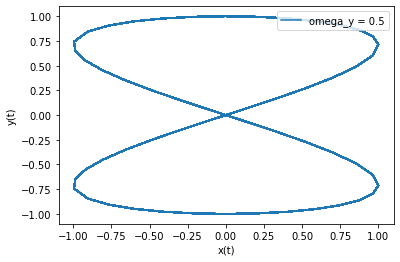

In [0]:
ra = array([.0,1.,1.,.0],float)
r = ra
t = a
h_atual = h

x_lista, y_lista, h_lista, t_lista = [], [], [], []

omega_y = 1/2
while t<=b:
    t_lista.append(t)
    x_lista.append(r[0])
    y_lista.append(r[2])
    h_lista.append(h_atual)
    dr, h_atual, h_prox = passo_adapt_extloc(f,r,t,h,prec)
    t, r = t + h_atual, r + dr
    h = h_prox

plt.plot(x_lista, y_lista, label=f'omega_y = {omega_y}')
plt.xlabel("x(t)")
plt.ylabel("y(t)")
plt.legend(loc='upper right')
plt.show()

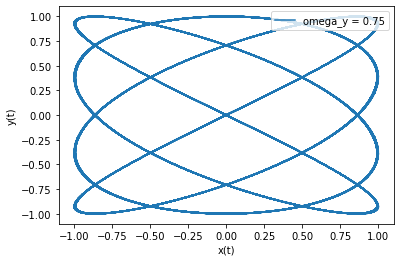

In [0]:
ra = array([.0,1.,1.,.0],float)
r = ra
t = a
h_atual = h

x_lista, y_lista, h_lista, t_lista = [], [], [], []

omega_y = 3/4
while t<=b:
    t_lista.append(t)
    x_lista.append(r[0])
    y_lista.append(r[2])
    h_lista.append(h_atual)
    dr, h_atual, h_prox = passo_adapt_extloc(f,r,t,h,prec)
    t, r = t + h_atual, r + dr
    h = h_prox

plt.plot(x_lista, y_lista, label=f'omega_y = {omega_y}')
plt.xlabel("x(t)")
plt.ylabel("y(t)")
plt.legend(loc='upper right')
plt.show()

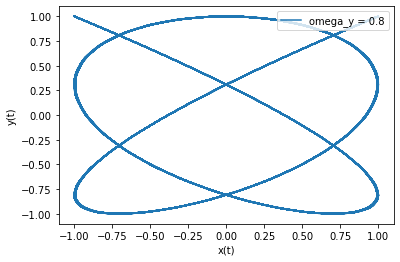

In [0]:
ra = array([.0,1.,1.,.0],float)
r = ra
t = a
h_atual = h

x_lista, y_lista, h_lista, t_lista = [], [], [], []

omega_y = 4/5
while t<=b:
    t_lista.append(t)
    x_lista.append(r[0])
    y_lista.append(r[2])
    h_lista.append(h_atual)
    dr, h_atual, h_prox = passo_adapt_extloc(f,r,t,h,prec)
    t, r = t + h_atual, r + dr
    h = h_prox

plt.plot(x_lista, y_lista, label=f'omega_y = {omega_y}')
plt.xlabel("x(t)")
plt.ylabel("y(t)")
plt.legend(loc='upper right')
plt.show()

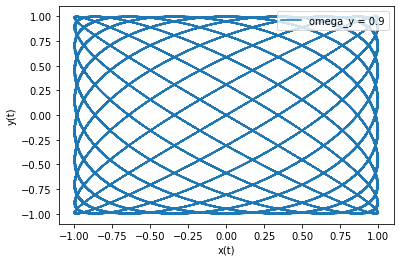

In [0]:
ra = array([.0,1.,1.,.0],float)
r = ra
t = a
h_atual = h

x_lista, y_lista, h_lista, t_lista = [], [], [], []

omega_y = 9/10
while t<=b:
    t_lista.append(t)
    x_lista.append(r[0])
    y_lista.append(r[2])
    h_lista.append(h_atual)
    dr, h_atual, h_prox = passo_adapt_extloc(f,r,t,h,prec)
    t, r = t + h_atual, r + dr
    h = h_prox

plt.plot(x_lista, y_lista, label=f'omega_y = {omega_y}')
plt.xlabel("x(t)")
plt.ylabel("y(t)")
plt.legend(loc='upper right')
plt.show()

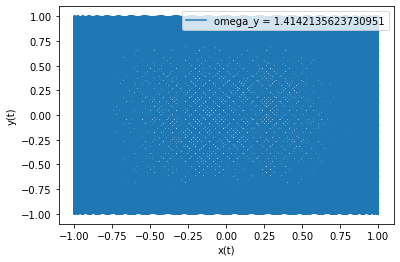

In [0]:
ra = array([.0,1.,1.,.0],float)
r = ra
t = a
h_atual = h

x_lista, y_lista, h_lista, t_lista = [], [], [], []

omega_y = 2**(1/2)
while t<=b:
    t_lista.append(t)
    x_lista.append(r[0])
    y_lista.append(r[2])
    h_lista.append(h_atual)
    dr, h_atual, h_prox = passo_adapt_extloc(f,r,t,h,prec)
    t, r = t + h_atual, r + dr
    h = h_prox

plt.plot(x_lista, y_lista, label=f'omega_y = {omega_y}')
plt.xlabel("x(t)")
plt.ylabel("y(t)")
plt.legend(loc='upper right')
plt.show()